In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
brand_analysis_df = pd.read_csv('brand_analysis_results.csv')
price_distribution_df = pd.read_csv('price_distribution.csv')

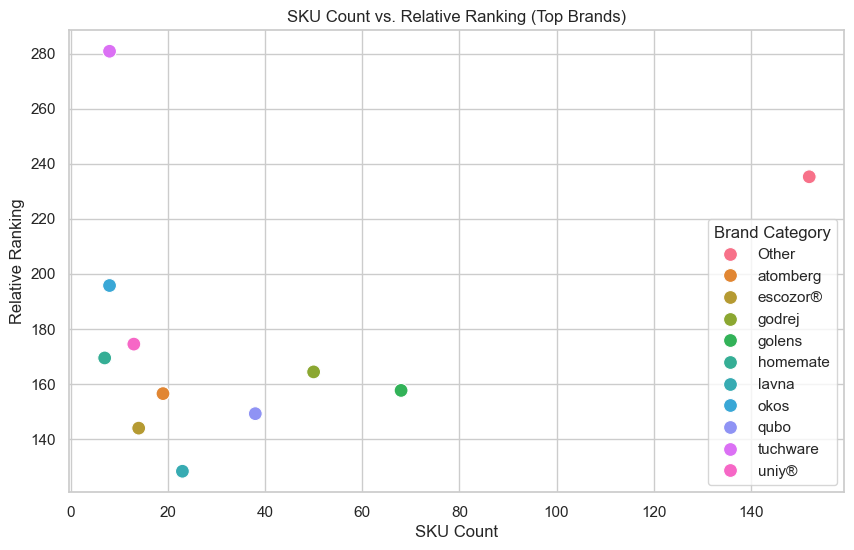

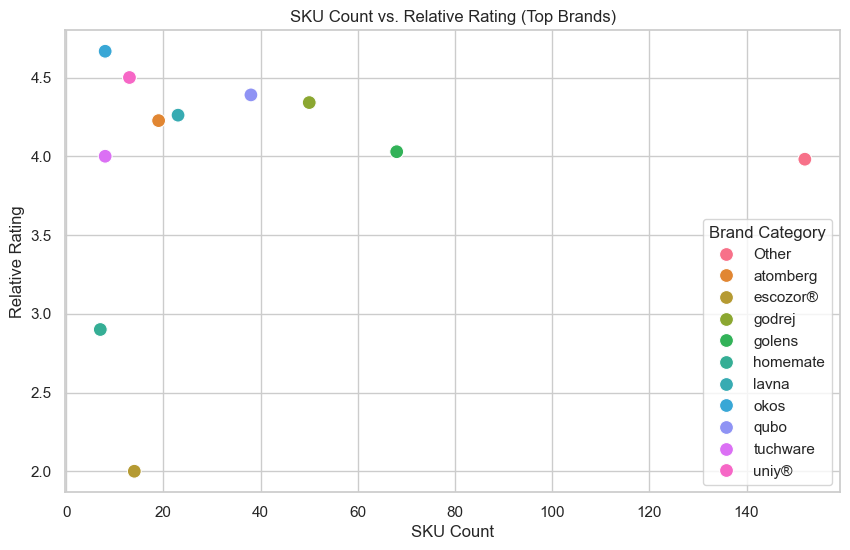

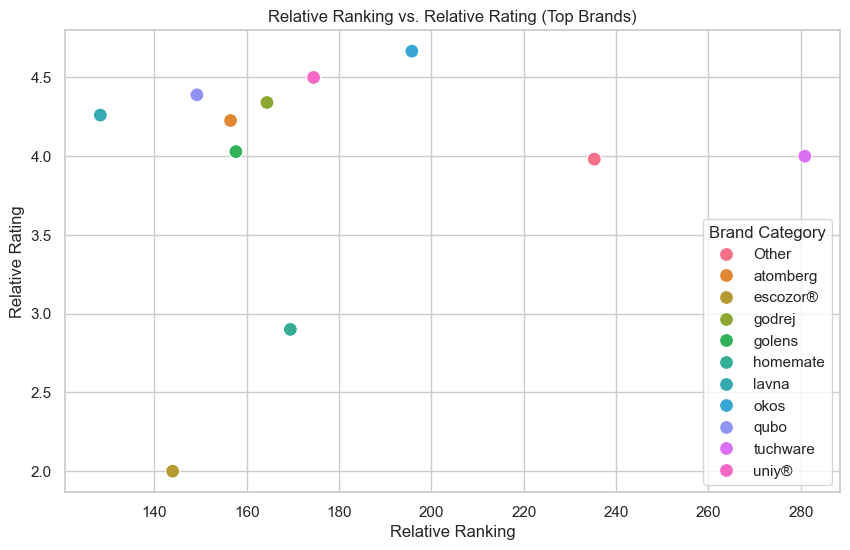

C:\Users\karti\AppData\Local\Temp\ipykernel_15640\4221326301.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_distribution_df, x='Price Band', y='count', palette='viridis')


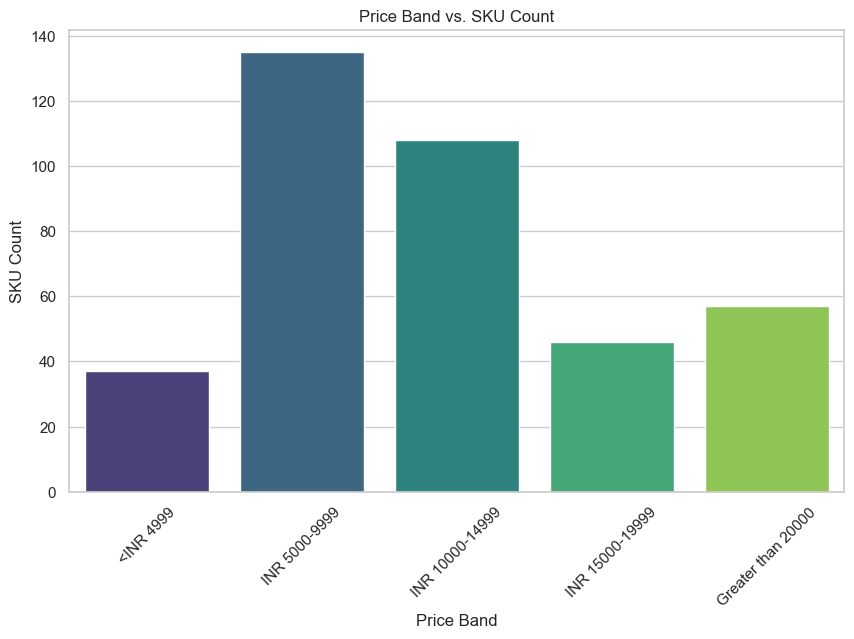

In [22]:
# Determine the number of top brands to display
top_n = 10

# Aggregate brands by SKU count and find the top N brands
top_brands = brand_analysis_df.groupby('Brand')['SKU Count'].sum().nlargest(top_n).index

# Categorize brands into 'Other' if they are not in the top brands
brand_analysis_df['Brand Category'] = brand_analysis_df['Brand'].apply(lambda x: x if x in top_brands else 'Other')

# Aggregate the data for 'Other' brands
aggregated_df = brand_analysis_df.groupby('Brand Category').agg({
    'SKU Count': 'sum',
    'Relative Ranking': 'mean',
    'Relative Rating': 'mean'
}).reset_index()

# SKU Count vs. Relative Ranking
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_df, x='SKU Count', y='Relative Ranking', hue='Brand Category', s=100)
plt.title('SKU Count vs. Relative Ranking (Top Brands)')
plt.xlabel('SKU Count')
plt.ylabel('Relative Ranking')
plt.show()

# SKU Count vs. Relative Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_df, x='SKU Count', y='Relative Rating', hue='Brand Category', s=100)
plt.title('SKU Count vs. Relative Rating (Top Brands)')
plt.xlabel('SKU Count')
plt.ylabel('Relative Rating')
plt.show()

# Relative Ranking vs. Relative Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_df, x='Relative Ranking', y='Relative Rating', hue='Brand Category', s=100)
plt.title('Relative Ranking vs. Relative Rating (Top Brands)')
plt.xlabel('Relative Ranking')
plt.ylabel('Relative Rating')
plt.show()

# Price Band vs. Count
plt.figure(figsize=(10, 6))
sns.barplot(data=price_distribution_df, x='Price Band', y='count', palette='viridis')
plt.title('Price Band vs. SKU Count')
plt.xlabel('Price Band')
plt.ylabel('SKU Count')
plt.xticks(rotation=45)
plt.show()
